<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Immigrations_Data_Visualization_with_Matplotlib/blob/master/Part_4_intro_to_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, let's import the data frame we cleaned and processed in part three from Github

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [209]:
data = 'https://raw.githubusercontent.com/Lawrence-Krukrubo/Immigrations_Data_Visualization_with_Matplotlib/master/part3_canada_df.csv'

In [210]:
canada_df = pd.read_csv(data)
canada_df.head()

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,Low
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,Low
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,Low


Since we may be referring often to columns from 1980 to 2013, let's save these as a list of strings and a list of integers

In [211]:
# Let's save the years columns from 1980 to 2013 in a variable called.. You guessed right! years
years = [str(year) for year in range(1980,2014)]

For Part 4, we shall begin **Explorative Data Analysis (EDA)** and displaying visual plots that depict our analysis. The dataset we shall explore is the immigration to Canada dataset from 194 countries to Canada from 1980 to 2013.

Next, let's set the index of the Dataframe to Country. So we can easily refer to countries by their names as we explore the data.

In [212]:
canada_df.set_index('Country', inplace=True, drop=True)
canada_df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639,Low
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699,Low
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439,Low
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6,Low
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15,Low


<font color='yellow'><h3><b>1. Line Plot:</b></h3></font>

It is a plot in the form of a series of Data points, connected by straight line segments. It is one of the most basic types of charts, and common in many fields, not just Data Science.

**When to Use Line Plots:** <br>The best use case is when we have a continuous Data set and we're interested in visualizing the data over a period of time. For example, visualizing the number of immigration from Haiti to Canada over a number of years.

**Let's start with a case study…**<br>
In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. 


We can quickly visualize this effort using a Line plot:

<h3>Exercise 1:</h3> 
Plot a line graph of immigration from Haiti using df.plot().

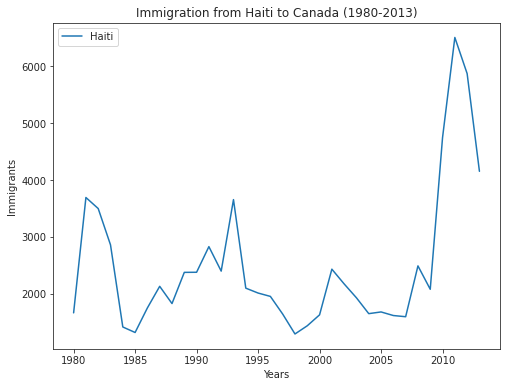

In [213]:
haiti_df = canada_df.loc['Haiti', years].to_frame()
sns.set_style('ticks')

# Let's plot the Line plot
haiti_df.plot(kind='line', figsize=(8,6))
plt.title('Immigration from Haiti to Canada (1980-2013)')
plt.xlabel('Years')
plt.ylabel('Immigrants')
plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

Note that plt.text() takes three values:-

1. The x coordinate or value `<int/float>`
2. The y coordinate or value `<int/float>`
3. The Text to be displayed at point (x, y) `<str>`

Since we used the years as index when creating the haiti_df, we need to get the index number of the index for '2010', if not pandas will throw an error.

But note that if years was of type int/float, then we can pass the value as-is.

In [214]:
haiti_df.index.get_loc('2010')

30

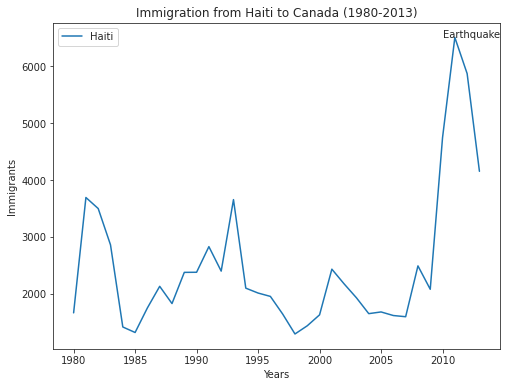

In [215]:
haiti_df.plot(figsize=(8,6))
plt.title('Immigration from Haiti to Canada (1980-2013)')
plt.ylabel('Immigrants')
plt.xlabel('Years')
plt.text(30, 6500, 'Earthquake')
plt.show()

<h2>Exercise 2:</h3>
Adding more countries to the line plot.

Let's compare the number of immigrants from Nigeria and Egypt from 1980 to 2013

In [216]:
# First, we select the countries for the plot

nigeria_egypt_haiti = canada_df.loc[['Nigeria', 'Egypt', 'Haiti'],years].T

nigeria_egypt_haiti.head()

Country,Nigeria,Egypt,Haiti
1980,81,612,1666
1981,60,660,3692
1982,58,755,3498
1983,58,455,2860
1984,78,447,1418


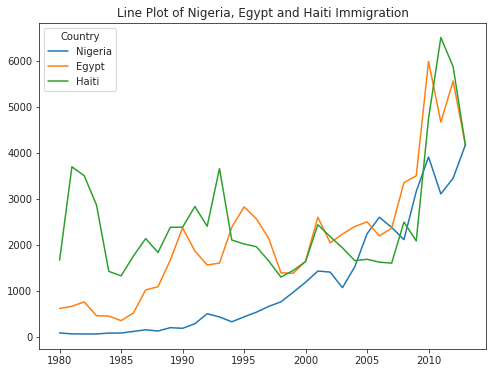

In [217]:
nigeria_egypt_haiti.plot(figsize=(8,6))
plt.title('Line Plot of Nigeria, Egypt and Haiti Immigration')
plt.show()

<font color='yellow'><h3><b>2. Area Plot:</b></h3></font>

An Area plot also known as Area chart or Area graph is a type of plot that depicts cumulative totals using numbers or percentages over time. It can be seen as an extension of Line plots. Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass stacked=False.

**When to Use Area Plots:** <br>The best use case is when we have a continuous Data set and we're interested in comparing two or more quantities over time.    data over a period of time. For example, visually comparing the countries with the highest or lowest migration to Canada.

Now that we know what an area plot is, let's try to generate Area plots for the countries with the highest migration to Canada.

First we need to sort canada_df by the countries with highest migrations and set inplace=True to mutate it in place.

In [218]:
canada_df.sort_values('Total', ascending=False, inplace=True)
canada_df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total,Migration_Rate
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904,V_High
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962,V_High
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500,V_High
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391,High
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600,Medium


Now that we've sorted it in descending order, let's save the top 5 countries in a Dataframe and make sure the years are in the index column by transposing it. So that matplotlib will plot the years on the horizontal x-axis

In [219]:
# First select the top 5 countries
top_5_df = canada_df.head()

# Next select only the columns representing the years for each country, before applying the transpose method.
top_5_df = top_5_df[years].transpose()

# let's view the selection
top_5_df.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Okay, so it's time for the Area Plot…

In [220]:
# First let's define a Font Dict
dict_={'fontsize': 18,
        'fontweight' : 10,
        'verticalalignment': 'baseline',
      'color': 'Red'}

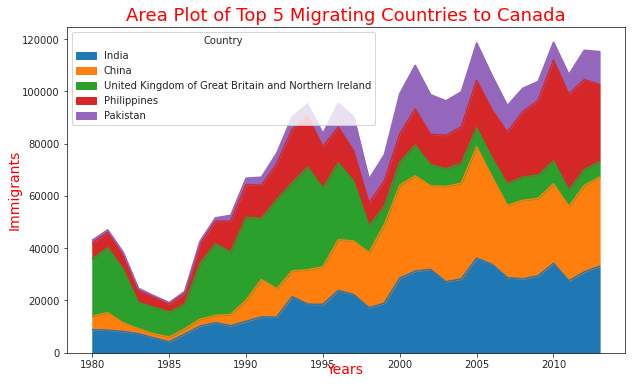

In [221]:
top_5_df.plot(kind='area', figsize=(10,6))
plt.title('Area Plot of Top 5 Migrating Countries to Canada', fontdict=dict_)

dict_['fontsize'] = 14
plt.xlabel('Years', fontdict=dict_)
plt.ylabel('Immigrants', fontdict=dict_)
plt.show()

So here we are, We see the five top countries with the highest migration figures to Canada, in descending order from India to Pakistan. This is also reflected in the Area-plot.
The respective colours reflect the size of migration for each country. With India (colour-blue) having the biggest chunk and Pakistan (colour-purple) having the least.

**Let's re-plot the above plot as an unstacked plot**

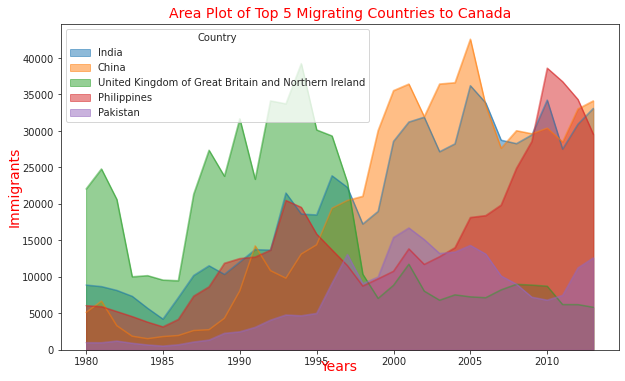

In [222]:
top_5_df.plot(kind='area', figsize=(10,6), stacked=False)
plt.title('Area Plot of Top 5 Migrating Countries to Canada', fontdict=dict_)

dict_['fontsize'] = 14
plt.xlabel('Years', fontdict=dict_)
plt.ylabel('Immigrants', fontdict=dict_)
plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter

Replot the above unstacked plot with alpha of 0.3

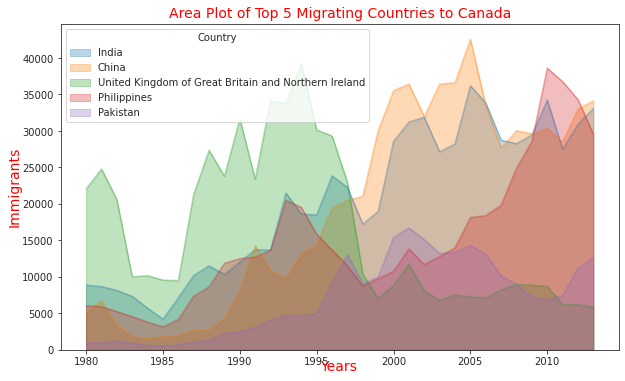

In [223]:
top_5_df.plot(kind='area', figsize=(10,6), stacked=False, alpha=0.3)
plt.title('Area Plot of Top 5 Migrating Countries to Canada', fontdict=dict_)

dict_['fontsize'] = 14
plt.xlabel('Years', fontdict=dict_)
plt.ylabel('Immigrants', fontdict=dict_)
plt.show()

Alpha also works on Stacked plots, let's see alpha on both stacked and unstacked plots. 
<br>For best experience, i would plot these using the Artist layer from Part 1.

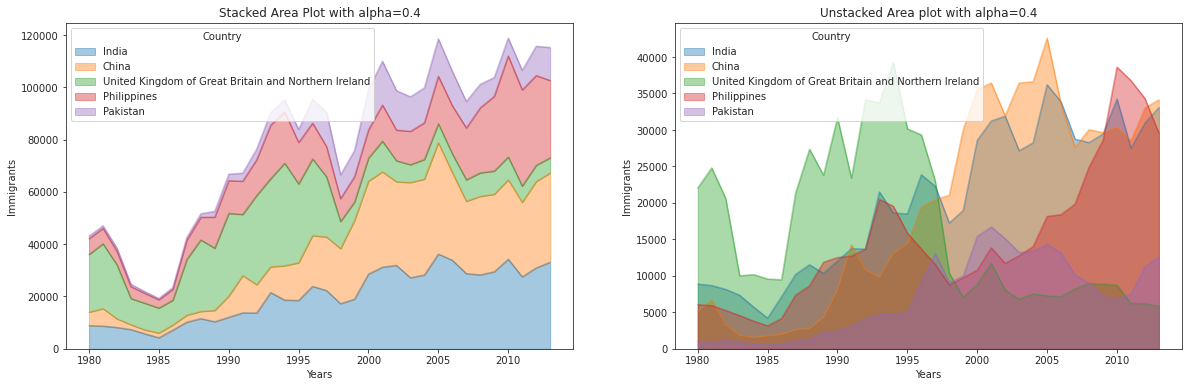

In [224]:
fig = plt.figure(figsize=(20,6)) # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot)

# Subplot 1: Stacked Area plot
top_5_df.plot(kind='area', alpha=0.4, ax=ax0) # add to subplot 1
ax0.set_title('Stacked Area Plot with alpha=0.4')
ax0.set_ylabel('Immigrants')
ax0.set_xlabel('Years')

# Subplot 2: Unstacked Area Plot
top_5_df.plot(kind='area', stacked=False, alpha=0.4, ax=ax1) # add to subplot 2
ax1.set_title ('Unstacked Area plot with alpha=0.4')
ax1.set_ylabel('Immigrants')
ax1.set_xlabel('Years')

plt.show()

We can see that the effect of a lower alpha on the Stacked Area-plot is that it reduces the colour intensity, while on the Unstacked plot, it increases the transparency. The reverse holds true for both plots.

<font color='yellow'><h3><b>Matplotlib Full Colors List</b></h3></font>

For a full listing of colors available in Matplotlib, run the following code in your python shell:

In [225]:
import matplotlib as mpl
color_list = []
for name, hex in mpl.colors.cnames.items():
    color_list.append((name,hex))

print(color_list)

[('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'), ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'), ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), ('darkorchid', '#9932CC'), ('darkred', '#8B0000'), ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), ('darkturquoi

Let's see howmany colours are available

In [226]:
len(color_list)

148

Wow, there are a hundred and forty eight different colors in Matplotlib, that's just awesome!
<br>Note that besides these individual colors, matplotlib has color maps or cmaps. cmaps are color gradients that may have a similar theme from soft to harder shades of colors.

Let's play a Game that plots 6 plots showing 6 random colors in Matplotlib

In [227]:
china_india = canada_df.loc[['China','India'],'Total']
china_india.head()

Country
China    659962
India    691904
Name: Total, dtype: int64

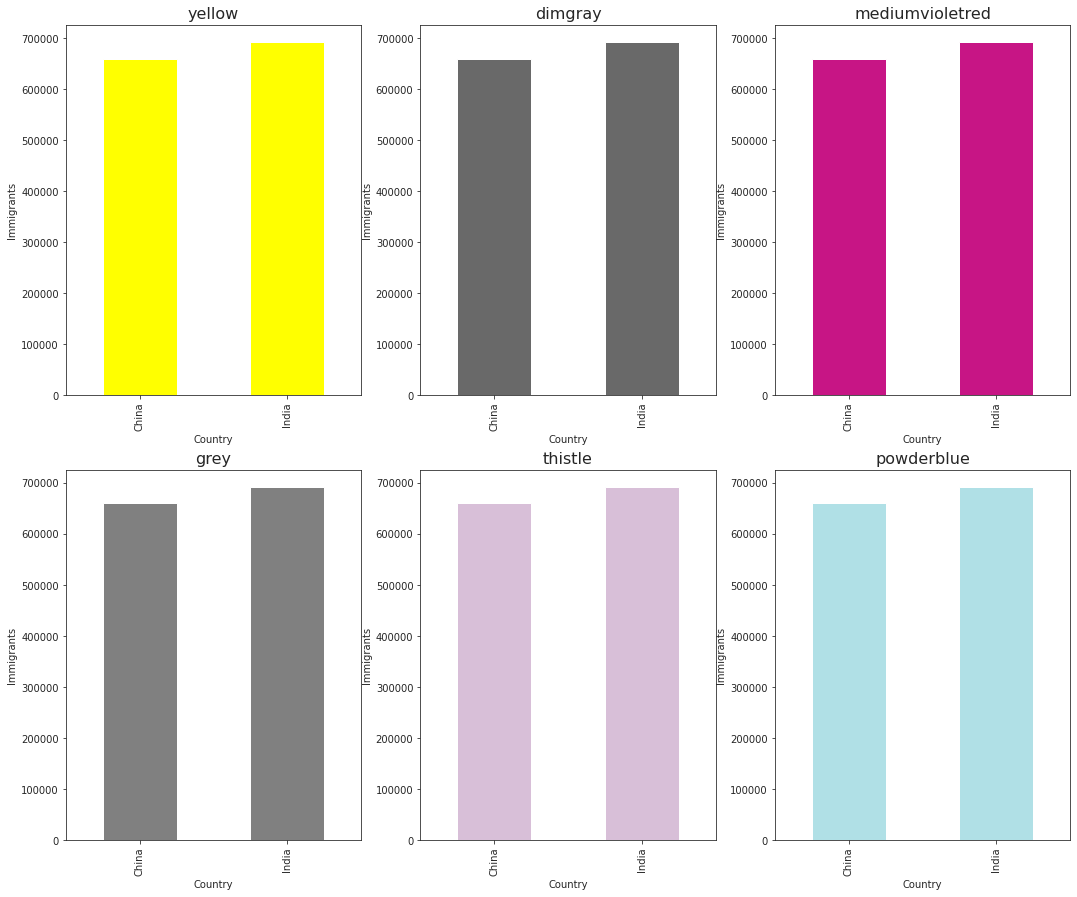

In [228]:
x = list(np.random.randint(0,len(color_list)+1,6))

fig = plt.figure(figsize=(18,15)) # create figure

ax0 = fig.add_subplot(231) 
ax1 = fig.add_subplot(232)
ax2 = fig.add_subplot(233)
ax3 = fig.add_subplot(234)
ax4 = fig.add_subplot(235)
ax5 = fig.add_subplot(236)


# Subplot 1:
title = color_list[x[0]][0]
china_india.plot(kind='bar', color=title, ax=ax0)
ax0.set_title(title, fontsize=16)
ax0.set_ylabel('Immigrants')

# Subplot 2:
title = color_list[x[1]][0]
china_india.plot(kind='bar', color=title, ax=ax1)
ax1.set_title(title, fontsize=16)
ax1.set_ylabel('Immigrants')

# Subplot 3:
title = color_list[x[2]][0]
china_india.plot(kind='bar', color=title, ax=ax2)
ax2.set_title(title, fontsize=16)
ax2.set_ylabel('Immigrants')

# Subplot 4:
title = color_list[x[3]][0]
china_india.plot(kind='bar', color=title, ax=ax3)
ax3.set_title(title, fontsize=16)
ax3.set_ylabel('Immigrants')

# Subplot 5:
title = color_list[x[4]][0]
china_india.plot(kind='bar', color=title, ax=ax4)
ax4.set_title(title, fontsize=16)
ax4.set_ylabel('Immigrants')

# Subplot 6:
title = color_list[x[5]][0]
china_india.plot(kind='bar', color=title, ax=ax5)
ax5.set_title(title, fontsize=16)
ax5.set_ylabel('Immigrants')


plt.show()

<font color='yellow'><h3><b>CMAP</b></h3></font>

This color map code below was cloned from the matplotlib website

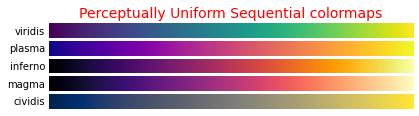

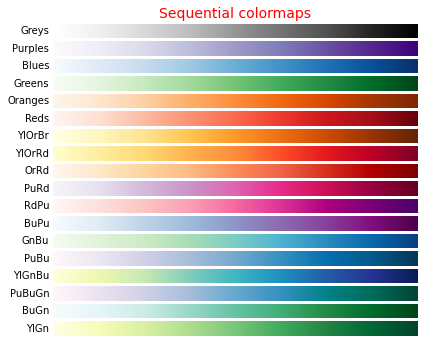

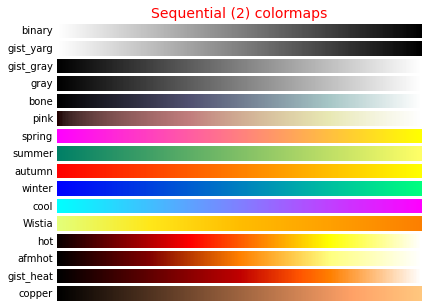

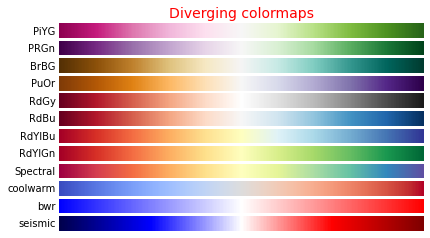

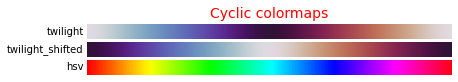

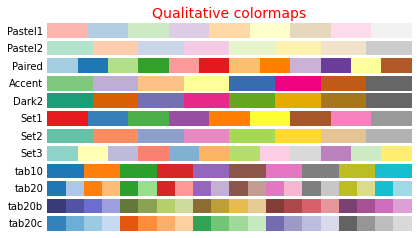

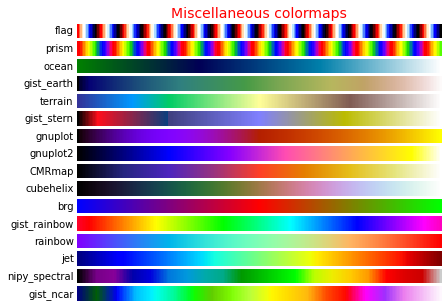

In [229]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14, color='red')

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes, color='black')

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()